Autores: 
José Ávalos Guzmán
Sebastián Arancibia Arzic

In [6]:
import pandas as pd # Estructura de datos
import numpy as np # Calculos 
import matplotlib.pyplot as plt
import sklearn as skl # Regresiones lineales
import seaborn as sns # Hacer graficos 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


Función para Cargar base de datos

In [36]:
def cargarBase (directorio, muestra = False, columnas = [] ):
    db = pd.read_csv(directorio, sep=";")
    if muestra: 
        
        # Seleccionar columnas 
        db = db[columnas]    
        
    return db
#db = cargarBase("metadatos.csv", True, ["lesion_id","age"])
db = cargarBase("Gaia_NaN.csv")
db = pd.DataFrame(db)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200669 entries, 0 to 200668
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               200669 non-null  int64  
 1   Class                            200464 non-null  object 
 2   N                                200504 non-null  float64
 3   Amplitude                        200500 non-null  float64
 4   Rcs                              200495 non-null  float64
 5   Meanvariance                     200502 non-null  float64
 6   Autocor_length                   200498 non-null  float64
 7   SlottedA_length                  200489 non-null  float64
 8   Con                              200495 non-null  float64
 9   SmallKurtosis                    200486 non-null  float64
 10  Std                              200479 non-null  float64
 11  Skew                             200492 non-null  float64
 12  Ma

Genere un diagnostico de estadistica descriptiva y de datos faltantes

In [30]:
db.isnull().sum()

ID                                   0
Class                              205
N                                  165
Amplitude                          169
Rcs                                174
Meanvariance                       167
Autocor_length                     171
SlottedA_length                    180
Con                                174
SmallKurtosis                      183
Std                                190
Skew                               177
MaxSlope                           183
MedianAbsDev                       154
MedianBRP                          171
PairSlopeTrend                     200
FluxPercentileRatioMid20           185
FluxPercentileRatioMid35           192
FluxPercentileRatioMid50           198
FluxPercentileRatioMid65           181
FluxPercentileRatioMid80           188
PercentDifferenceFluxPercentile    191
PercentAmplitude                   195
LinearTrend                        189
Eta_e                              181
Mean                     

In [26]:
db.describe()

,ID,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,Std,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
count,2.006690e+05,200504.000000,200500.000000,200495.000000,200502.000000,200498.000000,2.004890e+05,200495.000000,200486.000000,200479.000000,...,200479.000000,200492.000000,200493.000000,200474.000000,200481.000000,200503.000000,200486.000000,200484.000000,200497.000000,200477.000000
mean,4.604396e+18,32.695692,0.356176,0.937297,2.062129,0.001212,2.897808e+04,0.206498,0.355256,0.512036,...,105.912928,0.295963,0.306700,0.692552,0.341892,0.261975,-0.188302,5.872445,-0.347763,0.221509
std,1.576699e+18,12.950636,0.271657,0.142077,1.580114,0.007242,3.306361e+06,0.112087,0.142605,0.151632,...,276.940562,0.353363,0.059722,0.376318,0.313610,0.094390,0.604295,9.715638,1.149181,0.178227
min,1.197702e+16,20.000000,0.050792,0.110900,1.000000,0.000000,3.890648e-01,0.001687,0.003167,0.006041,...,0.054367,0.000000,0.132645,0.010864,0.007683,0.029167,-4.447674,0.073853,-2.033755,0.025378
25%,4.291328e+18,25.000000,0.186092,0.963342,1.000000,0.000000,1.778027e+02,0.124242,0.255477,0.412200,...,0.578941,0.008210,0.261232,0.406674,0.164552,0.184962,-0.596028,0.073975,-1.070657,0.114992
50%,4.687416e+18,30.000000,0.278785,0.998826,1.000000,0.000000,8.004447e+03,0.192851,0.348448,0.513206,...,1.354109,0.112423,0.297761,0.623141,0.266078,0.250388,-0.231007,0.147949,-0.630000,0.170876
75%,5.877412e+18,36.000000,0.422385,0.999993,3.000000,0.000000,3.101320e+04,0.271957,0.447541,0.615319,...,34.970369,0.533834,0.345841,0.910752,0.385052,0.339110,0.169603,11.909912,0.030543,0.256884
max,6.917091e+18,242.000000,3.452071,1.000000,34.000000,0.125000,1.459391e+09,0.912962,0.969089,0.981342,...,4007.871094,1.000000,0.496244,3.019829,3.143382,0.496244,4.415321,135.817383,26.480636,1.747553


In [37]:
db= db.dropna(axis=0)

In [38]:
db.describe()

,ID,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,Std,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
count,1.909260e+05,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,1.909260e+05,190926.000000,190926.000000,190926.000000,...,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000,190926.000000
mean,4.604251e+18,32.690461,0.356190,0.937286,2.061851,0.001212,2.941626e+04,0.206529,0.355255,0.512112,...,105.793333,0.296174,0.306672,0.692662,0.341927,0.261975,-0.187894,5.875256,-0.348178,0.221526
std,1.577308e+18,12.967291,0.271687,0.142154,1.580715,0.007245,3.388147e+06,0.112135,0.142634,0.151612,...,276.653500,0.353438,0.059712,0.376365,0.313802,0.094341,0.604307,9.721124,1.148045,0.178257
min,1.197702e+16,20.000000,0.050792,0.110900,1.000000,0.000000,3.890648e-01,0.001687,0.003167,0.006041,...,0.054367,0.000000,0.132645,0.010864,0.007683,0.029167,-4.447674,0.073853,-2.033755,0.025378
25%,4.291456e+18,25.000000,0.186099,0.963388,1.000000,0.000000,1.775521e+02,0.124295,0.255406,0.412197,...,0.579095,0.008243,0.261230,0.406811,0.164565,0.185007,-0.596015,0.073975,-1.070891,0.114992
50%,4.687421e+18,30.000000,0.278726,0.998827,1.000000,0.000000,7.995168e+03,0.192811,0.348424,0.513223,...,1.354404,0.112461,0.297727,0.623287,0.266046,0.250450,-0.230546,0.147949,-0.629983,0.170782
75%,5.877481e+18,36.000000,0.422369,0.999993,3.000000,0.000000,3.099979e+04,0.271999,0.447531,0.615466,...,34.688449,0.534901,0.345762,0.910607,0.384927,0.339069,0.170925,11.909912,0.030689,0.256893
max,6.917091e+18,242.000000,3.452071,1.000000,34.000000,0.125000,1.459391e+09,0.912962,0.969089,0.981342,...,4007.871094,1.000000,0.496244,3.019829,3.143382,0.496244,4.415321,135.817383,26.480636,1.705771


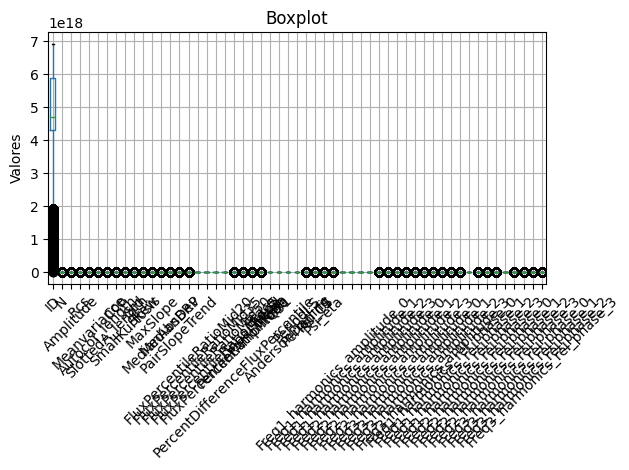

In [21]:
#db = db.drop(['lesion_id'], axis=1)
plt.figure()
db.select_dtypes(include='number').boxplot() 
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

In [ ]:
def limpiar(db):
    data = pd.DataFrame(db)
    data = data.fillna('')
    vectorizer = CountVectorizer()

    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].apply(str)
            X = vectorizer.fit_transform(data[column])
            df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
            print(df_vectorized, "\n")
    
    return data

In [ ]:
def diagnostico(descriptor, media=True, desviacion=True, perdidos=True, maximo=True, minimo=True):
    data = limpiar(descriptor)
    if media:
        medias = np.mean(data)
    if desviacion:
        desviacion = np.std(data)
    if perdidos:
        perdidos = np.isnan(data)
    if maximo:
        maximo = np.max(data)
    if minimo:
        minimo = np.min(data)

    return medias, desviacion, perdidos, maximo, minimo




In [ ]:
m = diagnostico(db)
m